In [0]:

# Network.py
from torch import nn

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 48*2, 11, stride=4, padding=0),
            nn.BatchNorm2d(48*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(48*2, 128*2, 5, 1, 2),
            nn.BatchNorm2d(128*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128*2, 192*2, 3, 1, 1),
            nn.BatchNorm2d(192*2),
            nn.ReLU(inplace=True),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(192*2, 192*2, 3, 1, 1),
            nn.BatchNorm2d(192*2),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(192*2, 128*2, 3, 1, 1),
            nn.BatchNorm2d(128*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(6*6*128*2, 2048*2),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048*2, 2048*2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2048*2, 62)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(-1, 6*6*128*2)
        x_class = self.classifier(x)
        return x_class


class Net(nn.Module):
    def __init__(self):
        # input: 128*128*3
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 6, 3),    # 126*126*6
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 63*63*6
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 20, 3),    # 61*61*12
            nn.ReLU(inplace=True),
            nn.Conv2d(20, 20, 3),    # 59*59*12
            nn.BatchNorm2d(20),
            nn.MaxPool2d(2),    # 29*29*12
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(20, 50, 3),    # 27*27*24
            nn.ReLU(inplace=True),
            nn.Conv2d(50, 50, 3),    # 25*25*24
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 12*12*24
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(50, 120, 3),    # 10*10*48
            nn.ReLU(inplace=True),
            nn.Conv2d(120, 120, 3),    # 3*3*48
            nn.BatchNorm2d(120),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 4*4*48
        )
        self.classifier = nn.Sequential(
            nn.Linear(4*4*120, 512),
            nn.Dropout2d(),
            nn.Linear(512, 128),
            nn.Dropout2d(),
            nn.Linear(128, 62)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(-1, 4*4*120)
        x_class = self.classifier(x)
        return x_class


class StrongNet(nn.Module):
    def __init__(self):
        super(StrongNet, self).__init__()
        self.train_size = 200    # input: 200*200*3
        self.model_dir = 'trained_StrongNet_model'
        self.best_wts_name = 'best_StrongNet_wts.pt'
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 12, 3, 1),    # 198*198*12
            nn.BatchNorm2d(12),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 99*99*12
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(12, 50, 3, 1),    # 97*97*50
            nn.ReLU(inplace=True),
            nn.Conv2d(50, 50, 3, 1, 1),    # 97*97*50
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 48*48*50
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(50, 200, 3, 1),    # 46*46*200
            nn.ReLU(inplace=True),
            nn.Conv2d(200, 200, 3, 1),    # 44*44*120
            nn.ReLU(inplace=True),
            nn.Conv2d(200, 200, 3, 1),   # 42*42*120
            nn.BatchNorm2d(200),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 21*21*200
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(200, 500, 3, 1),    # 19*19*500
            nn.ReLU(inplace=True),
            nn.Conv2d(500, 500, 3, 1),    # 17*17*500
            nn.ReLU(inplace=True),
            nn.Conv2d(500, 500, 3, 1, 1),    # 17*17*500
            nn.BatchNorm2d(500),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 8*8*500
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(500, 1000, 3, 1),    # 6*6*1000
            nn.ReLU(inplace=True),
            nn.Conv2d(1000, 1000, 3, 1, 1),    # 6*6*1000
            nn.ReLU(inplace=True),
            nn.Conv2d(1000, 1000, 3, 1, 1),    # 6*6*1000
            nn.BatchNorm2d(1000),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 3*3*1000
        )
        self.classifier = nn.Sequential(
            nn.Linear(3*3*1000, 2048),
            nn.Dropout2d(),
            nn.Linear(2048, 1024),
            nn.Dropout2d(),
            nn.Linear(1024, 512),
            nn.Dropout2d(),
            nn.Linear(512, 62),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(-1, 3*3*1000)
        x_class = self.classifier(x)
        return x_class

    def get_train_size(self):
        return self.train_size

    def get_model_dir(self):
        if not os.path.exists(self.model_dir):
            os.mkdir(self.model_dir)
        return self.model_dir

    def get_best_wts_name(self):
        return self.best_wts_name

# main.py
import torch
from torch import optim
from copy import deepcopy
import matplotlib.pyplot as plt
import re


Config = {
    'train_size': 128,     # 图像尺寸均值
    'train_batch_size': 128,
    'test_batch_size': 30,
    'epochs': 100,
    'lr': 0.001,
    'momentum': 0.9,
    'phase': 'train',
    'model_dir': 'trained_model'
}
best_wts_name = 'best_wts.pt'
positive_weight, negative_weight = 1, 3


def train(model, data_loader, criterion, optimizer, epochs, model_dir, device):
    best_acc = 0
    best_wts = dict()
    for epoch in range(1, epochs+1):
        for phase_id, phase in enumerate(('train', 'test')):
            epoch_loss = 0
            if phase=='train':
                model.train()
            else:
                model.eval()
            loader = data_loader[phase]
            acc_cnt = 0
            for batch in loader:
                imgs = batch['image'].to(device)
                label_class = batch['class'].to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase=='train'):
                    x_class = model(imgs)

                    _loss = criterion[phase_id](x_class, label_class) * len(imgs)
                    _, pre_class = torch.max(x_class, 1)
                    acc_cnt += torch.sum(pre_class==label_class)
                    # loss
                    positive_sample = pre_class == label_class
                    negative_sample = pre_class != label_class
                    positive_loss, negative_loss = 0, 0
                    if torch.sum(positive_sample)>0:
                        positive_loss = criterion[phase_id](x_class[positive_sample], label_class[positive_sample]) * positive_weight
                    if torch.sum(negative_sample)>0:
                        negative_loss = criterion[phase_id](x_class[negative_sample], label_class[negative_sample]) * negative_weight
                    loss = positive_loss + negative_loss
                    epoch_loss += loss.item()

                    if phase=='train':
                        loss.backward()
                        optimizer.step()

            epoch_loss /= len(loader.dataset)
            acc = acc_cnt.float() / len(loader.dataset) * 100.
            print(f"Epoch: {epoch}, {phase} loss: {epoch_loss}, acc: {acc:.2f}%")

            if phase=='test' and acc>best_acc:
                best_acc = acc
                best_wts = deepcopy(model.state_dict())
                torch.save(best_wts, best_wts_name)
                print(f"Best acc is {best_acc}, saved model")
            elif phase == 'train' and epoch % 10 == 0:
                torch.save(model.state_dict(), os.path.join(model_dir, f'model_{epoch}.pt'))
                print(f"saved model model_{epoch}.pt")
        print("==================================================")
    return best_acc



def finetune(model, data_loader, criterion, optimizer, epochs, model_dir, device):
    best_acc = 0
    best_wts = dict()
    # best model
    if os.path.exists(best_wts_name):
        try:
            model.load_state_dict(torch.load(best_wts_name))
        except RuntimeError:
            model.load_state_dict(torch.load(best_wts_name, map_location=lambda storage, loc: storage))

        loader = data_loader['test']
        model.eval()
        acc = 0
        with torch.no_grad():
            acc_cnt = 0
            for idx, batch in enumerate(loader):
                imgs = batch['image'].to(device)
                label_class = batch['class'].to(device)
                x_class = model(imgs)
                loss = criterion[1](x_class, label_class) * len(imgs)
                _, pred_class = torch.max(x_class, 1)
                acc_cnt += torch.sum(label_class==pred_class)
        acc = acc_cnt.float() / len(loader.dataset) * 100.
        print("Best accuracy is ", acc)
        print("Load best wts")
        best_acc = acc
        best_wts = deepcopy( model.state_dict())

    # last model
    model_name = \
    sorted(os.listdir(model_dir), key=lambda x: int(re.match('model_([\d]+).pt', x).group(1)))[-1]
    start_epoch = int(re.match('model_([\d]+).pt', model_name).group(1))
    try:
        model.load_state_dict(torch.load(os.path.join(model_dir, model_name)))
    except RuntimeError:
        model.load_state_dict(torch.load(os.path.join(model_dir, model_name), map_location=lambda storage, loc: storage))
    print(f"Load lsat model: {model_name}, continue train from {start_epoch} to {epochs}")

    for epoch in range(start_epoch, epochs + 1):
        for phase_id, phase in enumerate(('train', 'test')):
            epoch_loss = 0
            if phase == 'train':
                model.train()
            else:
                model.eval()
            loader = data_loader[phase]
            acc_cnt = 0
            for batch in loader:
                imgs = batch['image'].to(device)
                label_class = batch['class'].to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase=='train'):
                    x_class = model(imgs)

                    _loss = criterion[phase_id](x_class, label_class) * len(imgs)
                    _, pre_class = torch.max(x_class, 1)
                    acc_cnt += torch.sum(pre_class==label_class)
                    # loss
                    positive_sample = pre_class == label_class
                    negative_sample = pre_class != label_class
                    positive_loss, negative_loss = 0, 0
                    if torch.sum(positive_sample)>0:
                        positive_loss = criterion[phase_id](x_class[positive_sample], label_class[positive_sample]) * positive_weight
                    if torch.sum(negative_sample)>0:
                        negative_loss = criterion[phase_id](x_class[negative_sample], label_class[negative_sample]) * negative_weight
                    loss = positive_loss + negative_loss
                    epoch_loss += loss.item()

                    if phase=='train':
                        loss.backward()
                        optimizer.step()

            epoch_loss /= len(loader.dataset)
            acc = acc_cnt.float() / len(loader.dataset) * 100.
            print(f"Epoch: {epoch}, {phase} loss: {epoch_loss}, acc: {acc:.2f}%")

            if phase == 'test' and acc > best_acc:
                best_acc = acc
                best_wts = deepcopy(model.state_dict())
                torch.save(best_wts, best_wts_name)
                print(f"Best acc is {best_acc}, saved model")
            elif phase == 'train' and epoch % 10 == 0:
                torch.save(model.state_dict(), os.path.join(model_dir, f'model_{epoch}.pt'))
                print(f"saved model model_{epoch}.pt")
        print("==================================================")
    return best_acc


def test(model:torch.nn.Module, data_loader, criterion, device):
    try:
        model.load_state_dict(torch.load(best_wts_name))
    except RuntimeError:
        model.load_state_dict(torch.load(best_wts_name, map_location=lambda storage, loc: storage))

    loader = data_loader['test']
    model.eval()
    acc = 0
    total_loss = 0
    with torch.no_grad():
        acc_cnt = 0
        for idx, batch in enumerate(loader):
            imgs = batch['image'].to(device)
            label_class = batch['class'].to(device)
            x_class = model(imgs)
            loss = criterion[1](x_class, label_class) * len(imgs)
            total_loss += loss.item()
            _, pred_class = torch.max(x_class, 1)
            acc_cnt += torch.sum(label_class==pred_class)
            print(f"batch_id: {idx}, loss: {loss.item()}, acc_cnt = {torch.sum(label_class==pred_class)}")
        total_loss /= len(loader.dataset)
        acc = acc_cnt.float() / len(loader.dataset) * 100.
    return total_loss, acc


def predict(model, data_loader, criterion, device):
    try:
        model.load_state_dict(torch.load(best_wts_name))
    except RuntimeError:
        model.load_state_dict(torch.load(best_wts_name, map_location=lambda storage, loc: storage))

    loader = data_loader['test']
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(loader):
            imgs = batch['image'].to(device)
            label_class = batch['class'].to(device)
            x_class = model(imgs)
            _, pred_class = torch.max(x_class, 1)
            if idx==0:
                for i in range(len(imgs)):
                    img = ToPILImage()(imgs[i])
                    plt.title(f"(preddict) {pred_class[i]} - {label_class[i]} (target)")
                    plt.imshow(img)
                    plt.show()
            break



def main(network:torch.nn.Module):
    data_loader = loadData(args)
    print("===> Load Data")

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(device)
    model = network().to(device)

    # train_class_num, test_class_num = torch.FloatTensor([0]*62), torch.FloatTensor([0]*62)
    # for sample in data_loader['train'].dataset:
    #     train_class_num[sample['class']] += 1
    # for sample in data_loader['test'].dataset:
    #     test_class_num[sample['class']] += 1
    # train_loss_weight = torch.mean(train_class_num) / train_class_num
    # test_loss_weight = torch.mean(test_class_num) / test_class_num
    # criterion = [torch.nn.CrossEntropyLoss(weight=train_loss_weight.to(device)), torch.nn.CrossEntropyLoss(weight=test_loss_weight.to(device))]
    criterion = [torch.nn.CrossEntropyLoss(), torch.nn.CrossEntropyLoss()] 
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    print("===> Build model")
    if args.phase.capitalize() == 'Train':
        print('===> Start Train')
        acc = train(model, data_loader, criterion, optimizer, args.epochs, args.model_dir, device)
        print(f"Train finished, best accuracy is {acc}")
    elif args.phase.capitalize() == 'Test':
        print('=== Start test')
        loss, acc = test(model, data_loader, criterion, device)
    elif args.phase.capitalize() == 'Finetune':
        print('===> Start finetune')
        acc = finetune(model, data_loader, criterion, optimizer, args.epochs, args.model_dir, device)
        print(f"Train finished, best accuracy is {acc}")
    elif args.phase.capitalize() == 'Predict':
        print('===> Start predict')
        predict()


if __name__ == '__main__':
    remount()
    # AlexNet
    # Config['train_size'] = 227
    # Config['train_batch_size'] = 200
    # Net
    # Config['train_size'] = 128
    # Config['model_dir'] = 'trained_plus_net_model'
    # best_wts_name = 'plus_net_best_wts.pt'
    # Config['phase'] = 'finetune'
    # Config['epochs'] = 500
    # StrongNet
    net = StrongNet
    Config['train_size'] = net().get_train_size()
    Config['model_dir'] = net().get_model_dir()
    best_wts_name = net().get_best_wts_name()
    Config['phase'] = 'finetune'
    Config['epochs'] = 200
    main(net)
    drive.flush_and_unmount()


# 网盘挂载


In [1]:
from google.colab import drive
import os

def remount():
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/traffic-sign/')

def unmount():
  drive.flush_and_unmount()

remount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 配置

In [0]:
from collections import namedtuple

Config = {
    'train_size': 227,     # 图像尺寸均值
    'train_batch_size': 128,
    'test_batch_size': 128,
    'epochs': 100,
    'lr': 0.001,
    'momentum': 0.9,
    'phase': 'train',
    'model_dir': 'trained_model',
    'positive_weight': 1,
    'negative_weight': 3,
    'best_wts_name': 'best_wts.pt',
}
Args = namedtuple('Args', Config.keys())
args = Args(*Config.values())

# 数据处理

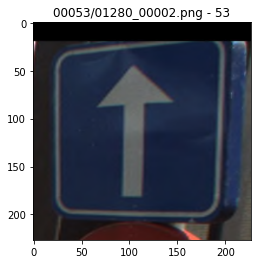

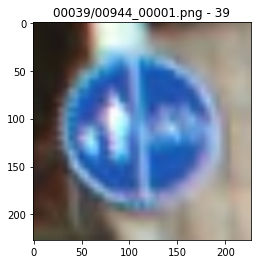

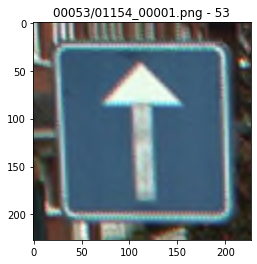

KeyboardInterrupt: ignored

In [3]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


TRAIN_DIR, TEST_DIR = 'traffic-sign/train', 'traffic-sign/test'
TRAIN_DOC = 'traffic-sign/train_label.csv'
TEST_DOC = 'traffic-sign/test_label.csv'

class MyDataset(Dataset):
    def __init__(self, dirFile, transform=None):
        # self.data = pd.read_csv(dirFile, nrows=30)
        self.data = pd.read_csv(dirFile)
        self.transform = transform

    def __len__(self):
        return self.data.index.size

    def __getitem__(self, idx):
        # print(idx)
        if idx >= self.__len__():
            raise StopIteration
        image_name, class_id = self.data.loc[idx, ['image_location', 'class_id']]
        image = Image.open(image_name).convert('RGB')
        class_id = int(class_id)
        if self.transform:
            image = self.transform(image)
        sample = {'image': image, 'class': class_id, 'filename': os.path.join(*image_name.split('/')[-2:])}
        return sample


def loadData(args):
    train_transform = transforms.Compose([transforms.Resize((args.train_size, args.train_size)),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),])
    test_transform = transforms.Compose([transforms.Resize((args.train_size, args.train_size)),
                                         transforms.ToTensor()])
    train_dataset = MyDataset(TRAIN_DOC, transform=train_transform)
    test_dataset = MyDataset(TEST_DOC, transform=test_transform)
    train_loader = DataLoader(train_dataset, batch_size=args.train_batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=args.test_batch_size, shuffle=True)
    data_loader = {'train': train_loader, 'test': test_loader}
    return data_loader


def visualize(data_loader):
    dataset = data_loader['train'].dataset
    # random display random_size sample of train
    random_size = 3
    for idx in np.random.randint(0, len(dataset), random_size):
        sample = dataset[idx]
        image, class_id, filename = sample['image'], sample['class'], sample['filename']
        plt.title(f"{filename} - {class_id}")
        plt.imshow(transforms.ToPILImage()(image))
        plt.show()

if __name__ == '__main__':
    data_loader = loadData(args)
    visualize(data_loader)
    import torch
    train_class_num, test_class_num = torch.FloatTensor([0]*62), torch.FloatTensor([0]*62)
    # for sample in data_loader['train'].dataset:
    #     train_class_num[sample['class']] += 1
    # for sample in data_loader['test'].dataset:
    #     test_class_num[sample['class']] += 1
    # train_loss_weight = torch.mean(train_class_num) / train_class_num
    # test_loss_weight = torch.mean(test_class_num) / test_class_num

# 网络

In [0]:
from torch import nn

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.config = Config.copy()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 48*2, 11, stride=4, padding=0),
            nn.BatchNorm2d(48*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(48*2, 128*2, 5, 1, 2),
            nn.BatchNorm2d(128*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128*2, 192*2, 3, 1, 1),
            nn.BatchNorm2d(192*2),
            nn.ReLU(inplace=True),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(192*2, 192*2, 3, 1, 1),
            nn.BatchNorm2d(192*2),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(192*2, 128*2, 3, 1, 1),
            nn.BatchNorm2d(128*2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(6*6*128*2, 2048*2),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048*2, 2048*2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2048*2, 62)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(-1, 6*6*128*2)
        x_class = self.classifier(x)
        return x_class

    def getConfig(self):
        self.config['train_size'] = 227
        self.config['train_batch_size'] = 200
        if not os.path.exists(self.config['model_dir']):
            os.mkdir(self.config['model_dir'])
        return self.config

class Net(nn.Module):
    def __init__(self):
        self.config = Config.copy()
        # input: 128*128*3
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 6, 3),    # 126*126*6
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 63*63*6
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 12, 3),    # 61*61*12
            nn.ReLU(inplace=True),
            nn.Conv2d(12, 12, 3),    # 59*59*12
            nn.BatchNorm2d(12),
            nn.MaxPool2d(2),    # 29*29*12
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(12, 24, 3),    # 27*27*24
            nn.ReLU(inplace=True),
            nn.Conv2d(24, 24, 3),    # 25*25*24
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 12*12*24
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(24, 48, 3),    # 10*10*48
            nn.ReLU(inplace=True),
            nn.Conv2d(48, 48, 3),    # 3*3*48
            nn.BatchNorm2d(48),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 4*4*48
        )
        self.classifier = nn.Sequential(
            nn.Linear(4*4*48, 512),
            # nn.Dropout2d(),
            nn.Linear(512, 128),
            # nn.Dropout2d(),
            nn.Linear(128, 62)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(-1, 4*4*48)
        x_class = self.classifier(x)
        return x_class

    def getConfig(self):
        self.config['train_size'] = 128
        self.config['model_dir'] = 'best_net_wts.pt'
        if not os.path.exists(self.config['model_dir']):
            os.mkdir(self.config['model_dir'])
        return self.config


class PlusNet(nn.Module):
    def __init__(self):
        self.config = Config.copy()
        # input: 128*128*3
        super(PlusNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 6, 3),    # 126*126*6
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 63*63*6
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 20, 3),    # 61*61*12
            nn.ReLU(inplace=True),
            nn.Conv2d(20, 20, 3),    # 59*59*12
            nn.BatchNorm2d(20),
            nn.MaxPool2d(2),    # 29*29*12
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(20, 50, 3),    # 27*27*24
            nn.ReLU(inplace=True),
            nn.Conv2d(50, 50, 3),    # 25*25*24
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 12*12*24
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(50, 120, 3),    # 10*10*48
            nn.ReLU(inplace=True),
            nn.Conv2d(120, 120, 3),    # 3*3*48
            nn.BatchNorm2d(120),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)    # 4*4*48
        )
        self.classifier = nn.Sequential(
            nn.Linear(4*4*120, 512),
            nn.Dropout2d(),
            nn.Linear(512, 128),
            nn.Dropout2d(),
            nn.Linear(128, 62)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(-1, 4*4*120)
        x_class = self.classifier(x)
        return x_class

    def getConfig(self):
        if not os.path.exists(self.config['model_dir']):
            os.mkdir(self.config['model_dir'])
        return self.config


class StrongNet(nn.Module):
    def __init__(self):
        self.config = Config.copy()
        super(StrongNet, self).__init__()
        # input: 200*200*3
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 12, 3, 1),    # 198*198*12
            nn.BatchNorm2d(12),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 99*99*12
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(12, 50, 3, 1),    # 97*97*50
            nn.ReLU(inplace=True),
            nn.Conv2d(50, 50, 3, 1, 1),    # 97*97*50
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 48*48*50
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(50, 200, 3, 1),    # 46*46*200
            nn.ReLU(inplace=True),
            nn.Conv2d(200, 200, 3, 1),    # 44*44*120
            nn.ReLU(inplace=True),
            nn.Conv2d(200, 200, 3, 1),   # 42*42*120
            nn.BatchNorm2d(200),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 21*21*200
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(200, 500, 3, 1),    # 19*19*500
            nn.ReLU(inplace=True),
            nn.Conv2d(500, 500, 3, 1),    # 17*17*500
            nn.ReLU(inplace=True),
            nn.Conv2d(500, 500, 3, 1, 1),    # 17*17*500
            nn.BatchNorm2d(500),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 8*8*500
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(500, 1000, 3, 1),    # 6*6*1000
            nn.ReLU(inplace=True),
            nn.Conv2d(1000, 1000, 3, 1, 1),    # 6*6*1000
            nn.ReLU(inplace=True),
            nn.Conv2d(1000, 1000, 3, 1, 1),    # 6*6*1000
            nn.BatchNorm2d(1000),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),    # 3*3*1000
        )
        self.classifier = nn.Sequential(
            nn.Linear(3*3*1000, 2048),
            nn.Dropout2d(),
            nn.Linear(2048, 1024),
            nn.Dropout2d(),
            nn.Linear(1024, 512),
            nn.Dropout2d(),
            nn.Linear(512, 62),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(-1, 3*3*1000)
        x_class = self.classifier(x)
        return x_class
    
    def getConfig(self):
        self.config['train_size'] = 200
        self.config['model_dir'] = 'trained_StrongNet_model'
        self.config['best_wts_name'] = 'best_StrongNet_wts.pt'
        if not os.path.exists(self.config['model_dir']):
            os.mkdir(self.config['model_dir'])
        return self.config



# 训练

In [0]:
import torch
from torch import optim
from torchvision.transforms import ToPILImage
from copy import deepcopy
import matplotlib.pyplot as plt
import os
import re

def train(model, data_loader, criterion, optimizer, epochs, args, device, start_epoch=1, best_acc=0):
    fig = plt.figure()
    ax_color = ('#337ab7', '#5cb85c', '#d9534f')    # 训练集、测试集和最佳模型颜色
    ax_loss, ax_acc = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)
    ax_loss.set_title('Loss')
    ax_acc.set_title('Accuracy')
    ax_acc.set_ylim(0, 1)    # 准确率的范围为0-1
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []
    best_acc = best_acc
    best_wts = dict()
    plt.ion()
    for epoch in range(start_epoch, epochs+1):
        for phase_id, phase in enumerate(('train', 'test')):
            epoch_loss = 0
            if phase=='train':
                model.train()
                loss_list = train_loss
                acc_list = train_acc
            else:
                model.eval()
                loss_list = test_loss
                acc_list = test_acc
            loader = data_loader[phase]
            acc_cnt = 0
            for batch in loader:
                imgs = batch['image'].to(device)
                label_class = batch['class'].to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase=='train'):
                    x_class = model(imgs)

                    _loss = criterion[phase_id](x_class, label_class) * len(imgs)
                    _, pre_class = torch.max(x_class, 1)
                    acc_cnt += torch.sum(pre_class==label_class)
                    # loss
                    loss = criterion[phase_id](x_class, label_class)
                    # fotal loss
                    # positive_sample = pre_class == label_class
                    # negative_sample = pre_class != label_class
                    # positive_loss, negative_loss = 0, 0
                    # if torch.sum(positive_sample)>0:
                    #     positive_loss = criterion[phase_id](x_class[positive_sample], label_class[positive_sample]) * args.positive_weight
                    # if torch.sum(negative_sample)>0:
                    #     negative_loss = criterion[phase_id](x_class[negative_sample], label_class[negative_sample]) * args.negative_weight
                    # loss = positive_loss + negative_loss
                    epoch_loss += loss.item()

                    if phase=='train':
                        loss.backward()
                        optimizer.step()

            epoch_loss /= len(loader.dataset)
            acc = acc_cnt.float() / len(loader.dataset) * 100.
            # 绘图
            plt.cla()
            loss_list.append(epoch_loss)
            acc_list.append(acc)
            ax_acc.plot(train_acc, label='train', c=ax_color[0])
            ax_acc.plot(test_acc, label='test', c=ax_color[1])
            ax_loss.plot(train_loss, label='train', c=ax_color[0])
            ax_loss.plot(test_loss, label='test', c=ax_color[1])
            if epoch==start_epoch:
                ax_acc.legend(loc='upper left')
                ax_loss.legend(loc='upper right')
            print(f"Epoch: {epoch}, {phase} loss: {epoch_loss}, acc: {acc:.2f}%")

            if phase=='test' and acc>best_acc:
                best_acc = acc
                plt.text(epoch, acc+0.01, '{acc:.2f}%', c=ax_color[2])    # 标注当前最佳模型
                best_wts = deepcopy(model.state_dict())
                torch.save(best_wts, args.best_wts_name)
                print(f"Best acc is {best_acc}, saved model")
            elif phase == 'train' and epoch % 10 == 0:
                torch.save(model.state_dict(), os.path.join(args.model_dir, f'model_{epoch}.pt'))
                print(f"saved model model_{epoch}.pt")
        print("==================================================")
    return best_acc


def finetune(model, data_loader, criterion, optimizer, epochs, args, device):
    best_acc = 0
    best_wts = dict()
    # best model
    if os.path.exists(args.best_wts_name):
        try:
            model.load_state_dict(torch.load(args.best_wts_name))
        except RuntimeError:
            model.load_state_dict(torch.load(args.best_wts_name, map_location=lambda storage, loc: storage))

        loader = data_loader['test']
        model.eval()
        acc = 0
        with torch.no_grad():
            acc_cnt = 0
            for idx, batch in enumerate(loader):
                imgs = batch['image'].to(device)
                label_class = batch['class'].to(device)
                x_class = model(imgs)
                loss = criterion[1](x_class, label_class) * len(imgs)
                _, pred_class = torch.max(x_class, 1)
                acc_cnt += torch.sum(label_class==pred_class)
        acc = acc_cnt.float() / len(loader.dataset) * 100.
        print("Best accuracy is ", acc)
        print("Load best wts")
        best_acc = acc
        best_wts = deepcopy( model.state_dict())

    # last model
    model_name = \
    sorted(os.listdir(args.model_dir), key=lambda x: int(re.match('model_([\d]+).pt', x).group(1)))[-1]
    start_epoch = int(re.match('model_([\d]+).pt', model_name).group(1))
    model.load_state_dict(torch.load(os.path.join(args.model_dir, model_name)))
    print(f"Load lsat model: {model_name}, continue train from {start_epoch} to {epochs}")

    best_acc = train(model, data_loader, criterion, optimizer, epochs, args, device, start_epoch, best_acc)
    return best_acc


def test(model:torch.nn.Module, data_loader, criterion, device, args):
    try:
        model.load_state_dict(torch.load(args.best_wts_name))
    except RuntimeError:
        model.load_state_dict(torch.load(args.best_wts_name, map_location=lambda storage, loc: storage))

    loader = data_loader['test']
    model.eval()
    acc = 0
    total_loss = 0
    with torch.no_grad():
        acc_cnt = 0
        for idx, batch in enumerate(loader):
            imgs = batch['image'].to(device)
            label_class = batch['class'].to(device)
            x_class = model(imgs)
            loss = criterion[1](x_class, label_class) * len(imgs)
            total_loss += loss.item()
            _, pred_class = torch.max(x_class, 1)
            acc_cnt += torch.sum(label_class==pred_class)
            print(f"batch_id: {idx}, loss: {loss.item()}, acc_cnt = {torch.sum(label_class==pred_class)}")
    total_loss /= len(loader.dataset)
    acc = acc_cnt.float() / len(loader.dataset) * 100.
    return total_loss, acc


def predict(model, data_loader, criterion, device, args):
    try:
        model.load_state_dict(torch.load(args.best_wts_name))
    except RuntimeError:
        model.load_state_dict(torch.load(args.best_wts_name, map_location=lambda storage, loc: storage))

    loader = data_loader['test']
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(loader):
            imgs = batch['image'].to(device)
            label_class = batch['class'].to(device)
            x_class = model(imgs)
            _, pred_class = torch.max(x_class, 1)
            if idx==0:
                for i in range(len(imgs)):
                    img = ToPILImage()(imgs[i])
                    plt.title(f"(preddict) {pred_class[i]} - {label_class[i]} (target)")
                    plt.imshow(img)
                    plt.show()
            break


def statictic(model, data_loader, criterion, device, args):
    import numpy as np
    try:
        model.load_state_dict(torch.load(args.best_wts_name))
    except RuntimeError:
        model.load_state_dict(torch.load(args.best_wts_name, map_location=lambda storage, loc: storage))

    loader = data_loader['test']
    bad_dataset = []
    model.eval()
    with torch.no_grad():
        bad_cnt = 0
        for idx, batch in enumerate(loader):
            imgs = batch['image'].to(device)
            label_class = batch['class'].to(device)
            x_class = model(imgs)
            _, pred_class = torch.max(x_class, 1)
            bad_cnt += torch.sum(label_class!=pred_class)
            bad_sample = [label_class!=pred_class]
            bad_dataset.extend([{'origin_size': x, 'class': y} for (x, y) in zip(batch['origin_size'][bad_sample], label_class[bad_sample])])

    test_class_num = np.array([0]*62)
    for sample in loader.dataset:
        test_class_num[sample['class']] += 1
    bad_size = np.array([sample['origin_size'].numpy() for sample in bad_dataset])
    bad_class = np.array([sample['class'] for sample in bad_dataset])
    bad_size_cnt = np.sum(np.all(bad_size < (227, 227), 1)==True)
    bad_class_cnt = test_class_num[np.unique(bad_class)]
    return bad_cnt, bad_dataset


def main(Model:torch.nn.Module, config:dict):
    args = Args(*config.values())
    data_loader = loadData(args)
    print("===> Load Data")

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = Model.to(device)

    train_class_num, test_class_num = torch.FloatTensor([0]*62), torch.FloatTensor([0]*62)
    for sample in data_loader['train'].dataset:
        train_class_num[sample['class']] += 1
    for sample in data_loader['test'].dataset:
        test_class_num[sample['class']] += 1
    train_loss_weight = torch.mean(train_class_num) / train_class_num
    test_loss_weight = torch.mean(test_class_num) / test_class_num
    criterion = [torch.nn.CrossEntropyLoss(weight=train_loss_weight.to(device)), torch.nn.CrossEntropyLoss(weight=test_loss_weight.to(device))]
    # criterion = [torch.nn.CrossEntropyLoss(), torch.nn.CrossEntropyLoss()]
    # criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    # optimizer = optim.RMSprop(model.parameters(), lr=args.lr)
    print("===> Build model")
    if args.phase.capitalize() == 'Train':
        print('===> Start Train')
        acc = train(model, data_loader, criterion, optimizer, args.epochs, args, device)
        print(f"Train finished, best accuracy is {acc}")
    elif args.phase.capitalize() == 'Test':
        print('=== Start test')
        loss, acc = test(model, data_loader, criterion, device, args)
        print(f"Loss: {loss}  Accuracy: {acc}")
    elif args.phase.capitalize() == 'Finetune':
        print('===> Start finetune')
        finetune(model, data_loader, criterion, optimizer, args.epochs, args, device)
    elif args.phase.capitalize() == 'Predict':
        print('===> Start predict')
        predict(model, data_loader, criterion, device, args)
    elif args.phase.capitalize() == 'Statistic':
        bad_cnt, bad_dataset =statictic(model, data_loader, criterion, device, args)


if __name__ == '__main__':
    # AlexNet
    # net = AlexNet()
    # Net
    net = Net()
    # StrongNet
    # net = StrongNet()
    config = net.getConfig()

    # Test
    # Config['phase'] = 'test'
    # Statistic
    # Config['phase'] = 'statistic'
    # config.best_wts_name = 'best_net_wts.pt'
    # Config['train_size'] = 128
    config['epochs']=200
    main(net, config)

===> Load Data
===> Build model
===> Start Train
Epoch: 1, train loss: 0.021227788215964275, acc: 38.08%
Epoch: 1, test loss: 0.022350052803281752, acc: 47.70%
Best acc is 47.69841384887695, saved model
Epoch: 2, train loss: 0.006774830575690182, acc: 77.62%
Epoch: 2, test loss: 0.005270838063387644, acc: 83.81%
Best acc is 83.80952453613281, saved model
Epoch: 3, train loss: 0.0034521505666842926, acc: 88.36%
Epoch: 3, test loss: 0.004534044045777548, acc: 88.37%
Best acc is 88.37301635742188, saved model
Epoch: 4, train loss: 0.002063902492585249, acc: 92.61%
Epoch: 4, test loss: 0.0038902800175405683, acc: 87.34%
Epoch: 5, train loss: 0.0016434659133563413, acc: 94.69%
Epoch: 5, test loss: 0.0042341804338826075, acc: 92.34%
Best acc is 92.34127044677734, saved model
Epoch: 6, train loss: 0.0012002341116820108, acc: 95.43%
Epoch: 6, test loss: 0.004620445708906839, acc: 92.30%
Epoch: 7, train loss: 0.001068329194125541, acc: 96.19%
Epoch: 7, test loss: 0.0036571911284847864, acc: 94.